# **Data exploration and hypothesis testing**

### **Imports and Data Loading**

In [12]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Data exploration**

In [3]:
# Display first few rows
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle missing values.

In [4]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
# Since there is very little number of videos with missing values, we will drop those rows
data = data.dropna(axis=0)

In [9]:
# Making sure there are no missing values
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
# Data dimension

data.shape

(19084, 12)

### **Verified Status**

Let's look into this variable

Text(0.5, 1.0, 'Count of verified_status')

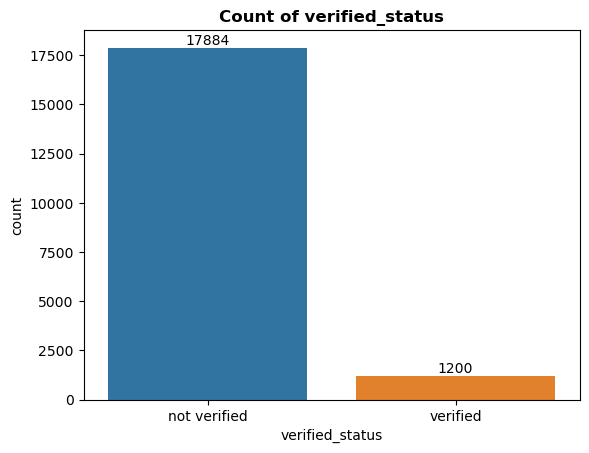

In [19]:
# Bar plot of 'verified_status'

a = sns.countplot(data,
              x = 'verified_status')
for bars in a.containers:
  a.bar_label(bars)
plt.title("Count of 'verified_status'", weight='bold')

Text(0.5, 1.0, "'claim_status' by 'verified_status'")

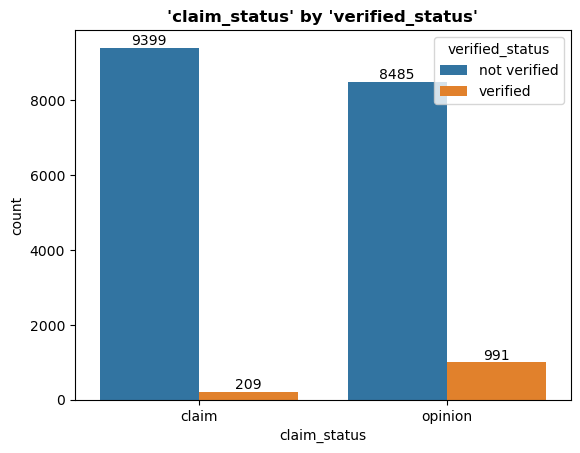

In [39]:
# Bar plot of 'claim_status' by 'verified_status'

a = sns.countplot(data,
              x = 'claim_status',
              hue = 'verified_status')
for bars in a.containers:
  a.bar_label(bars)
plt.title("'claim_status' by 'verified_status'", weight='bold')

Text(0.5, 1.0, "Kernel Density Estimation of 'video_view_count' by 'verified_status'")

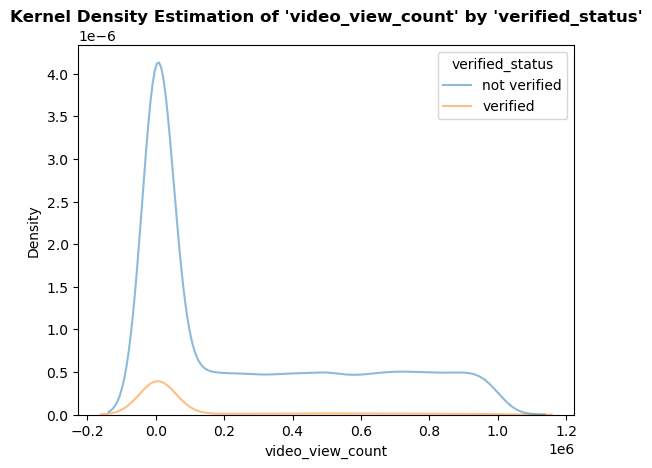

In [38]:
# Density plot of 'video_view_count' by 'verified_status'
sns.kdeplot(data, x='video_view_count', hue='verified_status', alpha=0.5)
plt.title("Kernel Density Estimation of 'video_view_count' by 'verified_status'", weight='bold')

### **Relationship between 'verified_status' and 'video_view_count'**

Let's look at their relationship by examining the mean values of `video_view_count` for each group of `verified_status` in the sample data.

In [14]:
# Mean `video_view_count` for each group in `verified_status`

data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

### **Hypothesis testing (Two-sample t-test)**

#### **Assumptions**:
* Random Sampling:
The samples used in our analysis were obtained through a random sampling process.
* Independence:
Each user and video in our dataset are not dependent on one another.
* Normality & Homogeneity of Variances:
From our previous EDA, most variables are right-skewed and the variance of these variables between the each group are not the same.

Since the assumptions of normality and homogeneity of variances are not met, we shall proceed with a two-sample t-test using Welch’s t-test.

**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts.</br>
**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts.

Choose 5% as the significance level.

In [23]:
# Conduct a two-sample t-test to compare means

# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small, we _reject_ the null hypothesis. There _is_ a statistically significant difference in the mean video view count between verified and unverified accounts.

### **Insights**

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts.

Since our end goal is to eventually make predictions on claim status, the next step will be to build a regression model on verified_status. A regression model for verified_status can help analyse user behavior in this group of verified users.